# OS11 - Exercise 12

In [1]:
from sympy import *

In [2]:
import random

In [3]:
import numpy as np

In [4]:
import scipy.linalg as linalg

In [5]:
from scipy.optimize import linprog

In [6]:
import matplotlib.pyplot as plt

In [7]:
from matplotlib import collections  as mc

In [8]:
import pylab as pl

In [9]:
import math

In [10]:
np.set_printoptions(threshold=1000)

## Ex. 12 

### Problem Data

Size of area where random data point will be created:

In [11]:
L = 100

Number of random data points:

In [12]:
N = 5

Random seed:

In [13]:
seed = '100'

### Data points creation

In [14]:
random.seed(seed)

points = [(random.randrange(L), random.randrange(L)) for i in range(N)]

points

[(45, 36), (75, 14), (73, 55), (22, 82), (13, 41)]

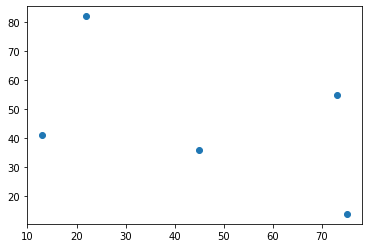

In [15]:
x, y = zip(*points)
plt.scatter(x, y)
plt.show()

### Arc-Node matrix creation

For each data point will be N-1 arcs, but to simplify code I'll use a squared configuration and later avoid i-i arcs:

In [16]:
M = N*N  # N*(N-1)
M

25

In [17]:
A = np.zeros((2*N, M)).astype(int)

A

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0]])

We can fill A matrix directly by problem data

In [18]:
for i in range(N):
    for j in range(N):
        if i != j:
            m = i*N + j
            A[i][m] = 1

for i in range(N):
    for j in range(N):
        if i != j:
            m = j*N + i
            A[N+i][m] = 1

Verificaciones:

In [19]:
A

array([[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0]])

In [20]:
A[N+1]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

### b and c vectors

Cost function:

In [21]:
def dist(a, b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

In [22]:
dist(points[0], points[1])

37.20215047547655

In [23]:
costos = [dist(points[i], points[j]) for i in range(N) for j in range(N)]
c = np.array(costos)

c

array([ 0.        , 37.20215048, 33.83784863, 51.42956348, 32.38826948,
       37.20215048,  0.        , 41.0487515 , 86.21484791, 67.62396025,
       33.83784863, 41.0487515 ,  0.        , 57.70615219, 61.6116872 ,
       51.42956348, 86.21484791, 57.70615219,  0.        , 41.97618372,
       32.38826948, 67.62396025, 61.6116872 , 41.97618372,  0.        ])

El verctor de igualdades b:
    

In [24]:
b = np.ones((2*N))

b

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Límites para cada arco:

In [25]:
limites = [(0, None) for a in range(M)]

### Resolution

In [26]:
r = linprog(c=c, A_eq = A, b_eq = b, bounds = limites, method='revised simplex')

<ipython-input-26-62916b0d23f2>:1: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  r = linprog(c=c, A_eq = A, b_eq = b, bounds = limites, method='revised simplex')


In [27]:
r

     con: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
     fun: 196.0411180576628
 message: 'Optimization terminated successfully.'
     nit: 15
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0.])

### Results

In [28]:
res = r.x
lines = []
idxs = []

for i in range(N):
    for j in range(N):
        m = N*i + j
        if res[m] > 0.1:
            lines.append([points[i], points[j]])
            idxs.append((i, j))
lines

[[(45, 36), (73, 55)],
 [(75, 14), (45, 36)],
 [(73, 55), (75, 14)],
 [(22, 82), (13, 41)],
 [(13, 41), (22, 82)]]

In [29]:
idxs

[(0, 2), (1, 0), (2, 1), (3, 4), (4, 3)]

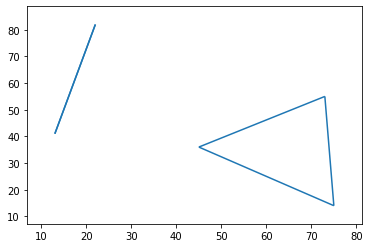

In [30]:
#lc = mc.LineCollection(lines, colors=c, linewidths=2)
lc = mc.LineCollection(lines)
fig, ax = pl.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)


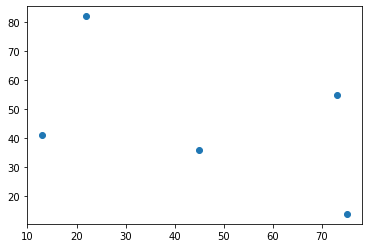

In [31]:
x, y = zip(*points)
plt.scatter(x, y)
plt.show()

### Conclusions

We can think about added restrictions to avoid cicles of lenght less that N-1.
A first restriction is in the form:

$$ x_{ij} + x_{ji} = 1 $$

to avoid cicles of leght 2. This implies a $ N(N-1)/2 $ new restrictions. Can be shown that resultant graph will be of the form of a collection of triangles.
To avoid cicles of lenght 3, we need to add $ N(N-1)(N-2)/(3*2)$ restrictions in the form $x_{ij} + x_{jk} + x_{ki} $. In the same way, we will end on restrictions in the order of $ N! $, showing that we can avoid the inherent problem complexity.
